Лабораторная работа номер 8. Экстремумы функции нескольких переменных.

Упражнение 1

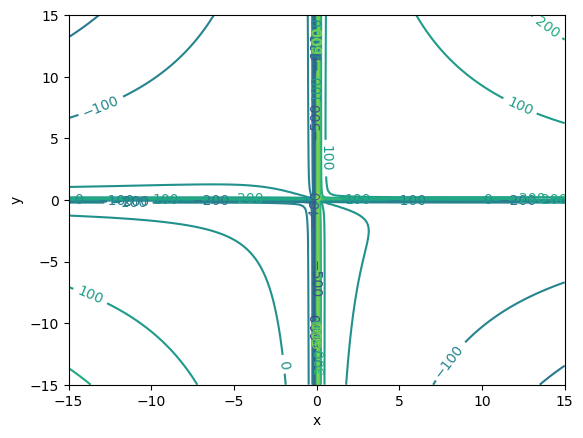

In [19]:
# f(x,y) = xy + 50/x + 20/y

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-15, 15, 200)
y = np.linspace(-15, 15, 200)
X, Y = np.meshgrid(x, y)
Z = X*Y + 50/X + 20/Y

fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z, levels=20)
ax.clabel(cs, cs.levels, inline=True, fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

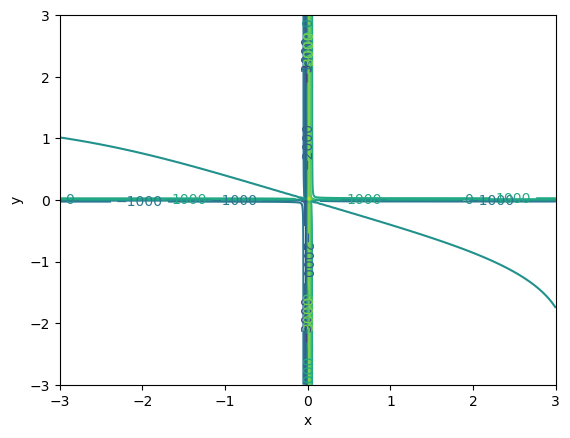

In [28]:
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = X*Y + 50/X + 20/Y

fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z, levels=10)
ax.clabel(cs, cs.levels, inline=True, fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

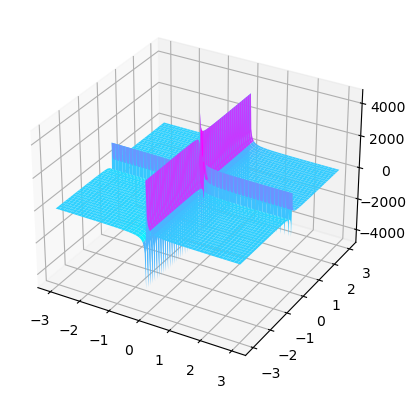

In [31]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, linewidth=0)

In [25]:
def f(t):
    x, y = t
    return x*y + 50/x + 20/y

In [40]:
from scipy.optimize import fmin

minimum, f_min, _, _, _ = fmin(f, np.array([0.01, 0.01]), xtol=1e-9, disp=False, full_output=True)
print('Min:', minimum)
print('f:', f_min)

minimum, f_min, _, _, _ = fmin(f, np.array([-0.01, 0.01]), xtol=1e-9, disp=False, full_output=True)
print('Min:', minimum)
print('f:', f_min)

minimum, f_min, _, _, _ = fmin(f, np.array([0.01, -0.01]), xtol=1e-9, disp=False, full_output=True)
print('Min:', minimum)
print('f:', f_min)

minimum, f_min, _, _, _ = fmin(f, np.array([-0.01, -0.01]), xtol=1e-9, disp=False, full_output=True)
print('Min:', minimum)
print('f:', f_min)

Min: [4.99999992 2.00000002]
f: 30.0
Min: [-2.69754941e-31  1.88343787e-02]
f: -1.853534168738487e+32
Min: [ 1.88343787e-02 -2.69754941e-31]
f: -7.414136674953948e+31
Min: [-2.69754941e-31 -1.16656213e-02]
f: -1.853534168738487e+32


Упражнение 2

In [42]:
def f(x, y):
    return x*y + 50/x + 20/y

def partial_derivs(f, x0, y0):
    df_dx = sp.diff(f, x)
    df_dy = sp.diff(f, y)
    
    d2f_dx2 = sp.diff(df_dx, x)
    d2f_dy2 = sp.diff(df_dy, y)
    d2f_dxdy = sp.diff(df_dx, y)
    
    df_dx_value = df_dx.subs({x: x0, y: y0})
    df_dy_value = df_dy.subs({x: x0, y: y0})
    d2f_dx2_value = d2f_dx2.subs({x: x0, y: y0})
    d2f_dy2_value = d2f_dy2.subs({x: x0, y: y0})
    d2f_dxdy_value = d2f_dxdy.subs({x: x0, y: y0})
    
    Hessian_matrix = sp.Matrix([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])
    main_minors = [Hessian_matrix[:i, :i].det() for i in range(1, Hessian_matrix.shape[0] + 1)]
    
    return df_dx_value, df_dy_value, d2f_dx2_value, d2f_dy2_value, d2f_dxdy_value, main_minors

In [44]:
x, y = sp.symbols('x y')
f_expr = x*y + 50/x + 20/y

x0 = 1
y0 = 1
df_dx_value, df_dy_value, d2f_dx2_value, d2f_dy2_value, d2f_dxdy_value, main_minors = partial_derivs(f_expr, x0, y0)

print("Значение частной производной по x:", df_dx_value)
print("Значение частной производной по y:", df_dy_value)
print("Значение второй производной по x:", d2f_dx2_value)
print("Значение второй производной по y:", d2f_dy2_value)
print("Значение второй смешанной производной:", d2f_dxdy_value)
print("Значения главных миноров матрицы:", main_minors)

Значение частной производной по x: -49
Значение частной производной по y: -19
Значение второй производной по x: 100
Значение второй производной по y: 40
Значение второй смешанной производной: 1
Значения главных миноров матрицы: [100/x**3, -1 + 4000/(x**3*y**3)]


Упражнение 3

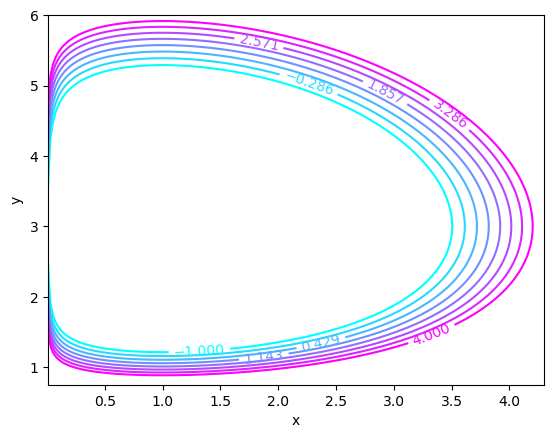

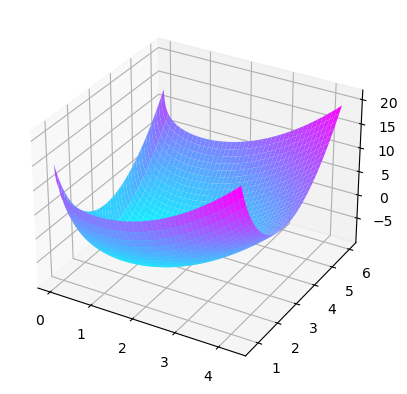

In [58]:
x = np.linspace(0.01, 4.3, 201)
y = np.linspace(0.75, 6, 201)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 - 2*np.log(X) - 18*np.log(Y)

fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z, levels=np.linspace(-1, 4, 8), cmap=cm.cool)
ax.clabel(cs, cs.levels, inline=True, fontsize=10)
plt.xlabel('x'); plt.ylabel('y')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, linewidth=0)

In [65]:
def f_3(t):
    x,y = t
    return x**2 + y**2 - 2*np.log(x) - 18*np.log(y)

minimum, f_min, _, _, _ = fmin(f_3, np.array([0.01, 3]), xtol=1e-9, disp=False, full_output=True)
print('Min:', minimum)
print('f:', f_min)

Min: [1.00000001 2.99999999]
f: -9.775021196025977


In [66]:
x, y = sp.symbols('x y')
f_expr = x**2 + y**2 - 2*sp.log(x) - 18*sp.log(y)

x0 = 1
y0 = 3
df_dx_value, df_dy_value, d2f_dx2_value, d2f_dy2_value, d2f_dxdy_value, main_minors = partial_derivs(f_expr, x0, y0)

print("Значение частной производной по x:", df_dx_value)
print("Значение частной производной по y:", df_dy_value)
print("Значение второй производной по x:", d2f_dx2_value)
print("Значение второй производной по y:", d2f_dy2_value)
print("Значение второй смешанной производной:", d2f_dxdy_value)
print("Значения главных миноров матрицы:", main_minors)

Значение частной производной по x: 0
Значение частной производной по y: 0
Значение второй производной по x: 4
Значение второй производной по y: 4
Значение второй смешанной производной: 0
Значения главных миноров матрицы: [2 + 2/x**2, 4 + 36/y**2 + 4/x**2 + 36/(x**2*y**2)]


В точке экстремума частные производные действительно равны нулю, необходимое и достаточное условие экстремума выполняется.

Упражнение 4

In [71]:
from sympy import Matrix

def stationary_points(f):
    x, y, z = sp.symbols('x y z')
    
    fx = sp.diff(f,x,1)
    fy = sp.diff(f,y,1)
    fz = sp.diff(f,z,1)
    
    fxx = sp.diff(f,x,2)
    fyy = sp.diff(f,y,2)
    fzz = sp.diff(f,z,2)
    
    fxy = sp.diff(fx,y,1)
    fxz = sp.diff(fx,z,1)
    fyz = sp.diff(fy,z,1)
    
    s = sp.solve([fx, fy, fz])
    for i in range(len(s)):
        try:
            x0y0z0 = ((x, s[i][x].evalf()), (y, s[i][y].evalf()), (z, s[i][z].evalf()))
            fxx1 = fxx.subs(x0y0z0)
            fyy1 = fyy.subs(x0y0z0)
            fzz1 = fzz.subs(x0y0z0)
    
            fxy1 = fxy.subs(x0y0z0)
            fxz1 = fxz.subs(x0y0z0)
            fyz1 = fyz.subs(x0y0z0)
        
            A = Matrix([[fxx1]]).det()
            B = Matrix([[fxx1, fxy1], [fxy1, fyy1]]).det()
            C = Matrix([[fxx1, fxy1, fxz1], [fxy1, fyy1, fyz1], [fxz1, fyz1, fzz1]]).det()
            if (A>0 and B>0 and C>0)or(A<0 and B<0 and C<0):
                print([s[i][x], s[i][y], s[i][z]], [float(A), float(B), float(C)])
        except Exception:
            continue

Упражнение 5

In [72]:
x, y, z = sp.symbols('x y z')
u = x + y/x +z/y + 2/z
stationary_points(u)

[2**(1/4), sqrt(2), 2**(3/4)] [1.6817928305074294, 1.5, 0.8408964152537146]
